# Matplotlib plotting system

To make a plot using matplotlib, one has to add figure and subplot. The former can be considered as the convass, and any visual element, needs to be plot on the subplot (axes).

## Basics of subplots

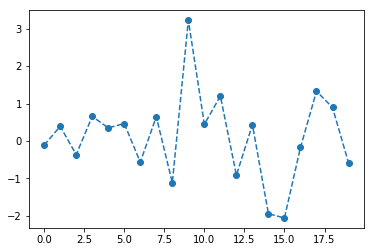

In [29]:
import matplotlib.pyplot as plt 
import numpy as np 

data = np.random.randn(20)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(data, marker='o', linestyle='--')

Adding the elements one by one might be a little painful when there are many subplots. Hence, one can use plt.subplots() to initialize a bunch of subplots at one time. Understandably, the function will return a figure object, along with a list of axes(subplots) 

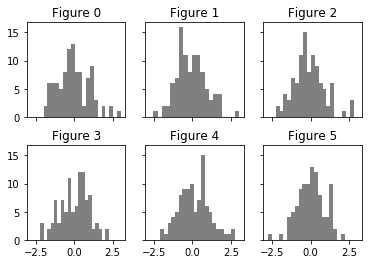

In [30]:
%matplotlib inline
figure, subplots = plt.subplots(2,3, sharex=True, sharey=True)
for idx, i in enumerate(subplots.flat):
    i.set_title(f'Figure {idx}')
    i.hist(np.random.randn(100), bins=20, alpha=0.5, color='k')
figure.subplots_adjust(hspace=0.3)

Several things going on here:
1. plt.subplot will give an array of subplots, but the dimension is 2 rows and 3 columns. However, if we wish to iterative the subplots like a list, we can simple use .flat method and get an iterator whose behavior resembles that of a list.
2. subplots_adjust() works on figure since it manipulates space in a figure level not a subplot level. There is also a top level function plt.subplots_adjust, but an object oriented way is more pythonic. 
3. sharex and sharey also works on the figure level, and what it does is to unify the axes ticks so that they get more comparable. 

Additionally, we can include the legend by adding to the label argument. More importantly, .legend has to be explicitly called otherwise it will not be displayed. 

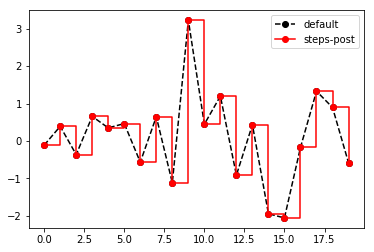

In [48]:
line_plots = plt.figure()
ax_1 = line_plots.add_subplot(1,1,1)
ax_1.plot(data, color='k', linestyle='--', marker='o', label='default')
ax_1.plot(data, color='r', linestyle='-', marker='o', drawstyle='steps-post', label='steps-post')
ax_1.legend()

For most of plot decorations (like the legend, title and etc), there are two ways to do things: using the procedural pyplot interface, and the more oo native matplotlib api. For instance, we can control the xrange by either using plt.xlim([0,10]) or using the subplot instance methods, which is axe.set_xlim(), in this case. The second way is apparently more clear and explicit when working with multiple subplots at the same time, while plt.xlim() works implicitly on the most recent axessubplot object.

Text(0.5, 0, 'x')

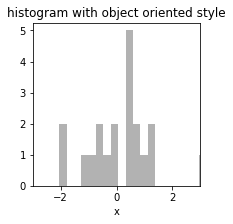

In [58]:
method_1 = np.random.randn(20)
p1 = plt.figure(figsize= [3,3])
subplot = p1.add_subplot(1,1,1)
subplot.hist(data, bins=20, color='k', alpha=0.3)
subplot.set_xlim([-3,3])
subplot.set_title('histogram with object oriented style')
subplot.set_xlabel('x')

Text(0.5, 0, 'x')

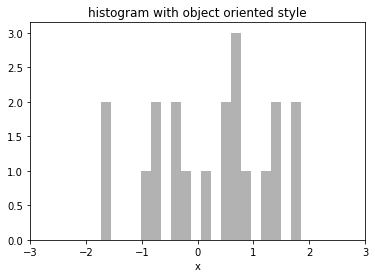

In [60]:
method_1 = np.random.randn(20)
plt.hist(method_1, bins=20, color='k', alpha=0.3)
#this way saves some lines when the layout is not complex, but less clear
#the current active axesubplot is uses implicitly.
#there is not ambiguity when there is only one figure after all
plt.xlim([-3,3])
plt.title('histogram with object oriented style')
plt.xlabel('x')

Alternatively, when it comes to set attribute to a subplot, there is another way that one can use, which involves passing a dictionary. 

[(-3, 3),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'histogram with object oriented style')]

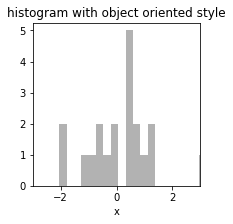

In [61]:
method_1 = np.random.randn(20)
p1 = plt.figure( figsize= [3,3])
subplot = p1.add_subplot(1,1,1)
subplot.hist(data, bins=20, color='k', alpha=0.3)
# subplot.set_xlim([-3,3])
# subplot.set_title('histogram with object oriented style')
# subplot.set_xlabel('x')
a_dict_of_preference = {'xlim': [-3,3], 
                        'title': 'histogram with object oriented style',
                       'xlabel': 'x'}
subplot.set(**a_dict_of_preference)

Annotation is something needs a bit more care since one needs to pass (1) where the arrow is pointing to and (2) where the text should be. arrowprops, additionally, determines the appearances of the arrow.

87


Text(87, 1, 'this is the lowest')

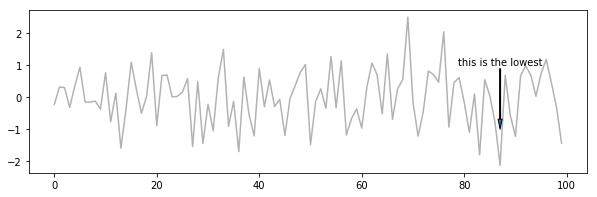

In [97]:
method_1 = np.random.randn(100)
p1 = plt.figure( figsize= [10,3])
subplot = p1.add_subplot(1,1,1)
subplot.plot(method_1, color='k', alpha=0.3)
subplot.annotate('this is the lowest', 
                 xy=(np.argmin(method_1),-1), 
                 xytext=(np.argmin(method_1),1), 
                 arrowprops=dict(width=1, headwidth=4, headlength=10),
                 horizontalalignment='center')

The last part is not so often used but turns out to be the building blocks of the system, the patches. To use them, we simly need to create a shape and add to the subplot object. By default, the shape scale is relative. In other words, the blue square is going to fill the whole figure if we set the width or length to 1.

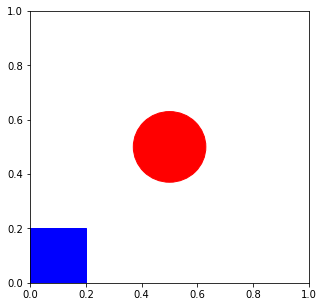

In [109]:
figure_for_patches = plt.figure(figsize=[5,5])
axis_ = figure_for_patches.add_subplot(1,1,1)

circle = plt.Circle((.5, .5), 0.13, color='r')
rect = plt.Rectangle((0, 0), 0.2, 0.2, color='b')
axis_.add_patch(circle)
axis_.add_patch(rect)